# Statistische Methoden für Umformtechniker

------------

Max Weiner

IMF-Kolloquium, 2022-11-01

![](qr.png)

## Inhalt

1. Motivation
2. Werkzeuge
3. Histogramme, Kennwerte, Verteilungen
4. Regression
5. Zusammenfassung

## Motivation

- schlechte/unpassende Ausbildung im Studium
- vebreitete Abneigung gegen das Thema
- Unwissenheit gefährlich
- aber: gewisse Grundkenntnisse im Ingenieursalltag äußerst nützlich

## Werkzeuge

1. **kein** Excel
2. Python
3. `numpy` - Vektoren, Matrizen, Listen
4. `scipy` - Interpolation, Optimierung, ...
5. `pandas` - Statistik
6. `matplotlib` - Plots

## Histogramme, Kennwerte, Verteilungen

### Laden von Daten mit `pandas`

`pandas` enthält viele Funktionen zum Einlesen gängiger Datenformate, z.B. CSV

In [1]:
import pandas as pd

data = pd.read_csv("pauses.csv", header=0)
data

,duration
0,5.955
1,4.509
2,5.556
3,5.552
4,4.636
...,...
77,4.661
78,4.238
79,5.211
80,5.495


In [2]:
series = data["duration"] # Auswahl einer Spalte

### Plot eines Histogramms mit `matplotlib`

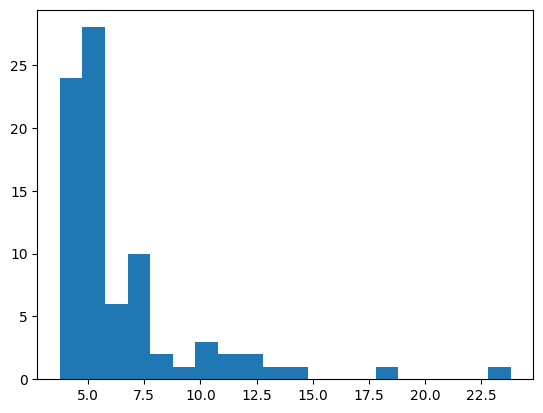

In [3]:
import matplotlib.pyplot as plt

plt.hist(series, bins=20)
plt.show()

### Berechnung von Kennwerten der Datenreihe

In [4]:
series.mean() # Mittelwert

6.505670731707317

In [5]:
series.std() # Standardabweichung

3.310100815498286

In [6]:
series.skew() # Schiefe

2.8879467395305483

### Modellierung der Daten durch eine Normalverteilung

- Normalverteilungen sind der am weitesten verbreitete Ansatz zur Beschreibung von Daten
- In Natur und Technik treten häufig annähernd normalverteilte Daten auf

In [7]:
from scipy import stats

norm = stats.norm(loc=series.mean(), scale=series.std())

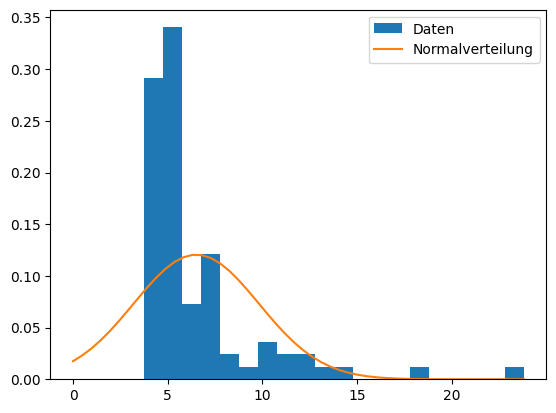

In [8]:
import numpy as np

x = np.linspace(0, series.max(), 50)
plt.hist(series, bins=20, density=True, label="Daten")
plt.plot(x, norm.pdf(x), label = "Normalverteilung")
plt.legend(); plt.show()

### Passt die Normalverteilung auf meine Daten?

- in Statistikvorlesungen werden häufig Normalitätstests gelehrt
    
> Normalitätstest haben zwei mögliche Aussagen: 1) ich habe zu wenig Daten 2) meine Daten sind nicht Normalverteilt. *Allan Downey*

- Frage ist **nicht**: Sind meine Daten normalverteilt?
- **Sondern**: Ist die Normalverteilung eine ausreichende Näherung an meine Daten?

$\rightarrow$ genaue Aussagen schwierig, aber einfache Daumenregeln!

- einfachste Möglichkeit: Histogramme und Summenhäufigkeiten betrachten und optisch abschätzen

## Summenhäufigkeitsverteilungen sind besser als Histogramme!

- gerade bei kleiner Datenlage

![](1695.png)

### Exponentialverteilung

Zerfallsprozesse, Lebensdauern.

### Gamma-Verteilung

Verallgemeinerte Exponentialverteilung.

$$ k = \frac{\mu^2}{\sigma^2} \quad \theta = \frac{\sigma^2}{\mu} $$

### Lognormalverteilung

Für Daten, deren Logarithmus normalverteilt ist.

### Beta-Verteilung

Für Daten mit Definitionsbereich $[0, 1]$ oder darauf skalierbarem.

$$ \alpha = \mu \left[ \frac{\mu (1 - \mu)}{\sigma^2} - 1 \right] \quad \beta = (1-\mu) \left[ \frac{\mu (1 - \mu)}{\sigma^2} - 1 \right] $$

In [9]:
k = series.mean()**2/series.std()**2; print("k =", k)
theta = series.std()**2/series.mean(); print("θ =", theta)

gamma = stats.gamma(a=k, scale=theta)

k = 3.862795484327411
θ = 1.6841872053808935


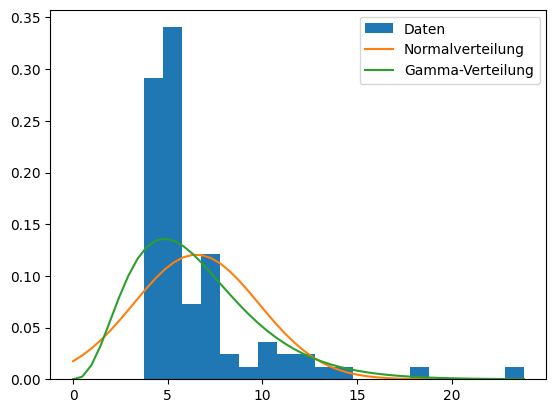

In [10]:
plt.hist(series, bins=20, density=True, label="Daten")
plt.plot(x, norm.pdf(x), label="Normalverteilung")
plt.plot(x, gamma.pdf(x), label="Gamma-Verteilung")
plt.legend(); plt.show()

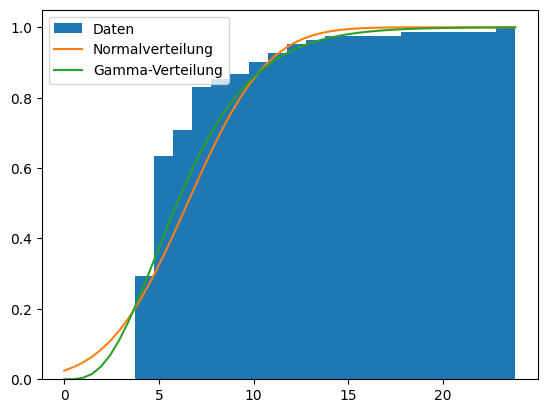

In [11]:
plt.hist(series, bins=20, cumulative=True, density=True, label="Daten")
plt.plot(x, norm.cdf(x), label="Normalverteilung")
plt.plot(x, gamma.cdf(x), label="Gamma-Verteilung")
plt.legend(); plt.show()

- Auffällig: keine Datenpunkte unterhalb von ca. 3.74 s
- Zeit benötigt zum Zustellen des Walzspaltes
- Berücksichtigung solcher Auffälligkeiten kann Modell der Verteilung stark verbessern.

$\rightarrow$ Prozesskentniss zur Interpretation der Daten notwendig!

In [12]:
series2 = series - series.min()

k2 = series2.mean()**2/series2.std()**2; print("k2 =", k2, "\tk =", k)
theta2 = series2.std()**2/series2.mean(); print("θ2 =", theta2, "\tθ =", theta)

gamma2 = stats.gamma(a=k2, scale=theta2)

k2 = 0.6945720322485311 	k = 3.862795484327411
θ2 = 3.9717561370513295 	θ = 1.6841872053808935


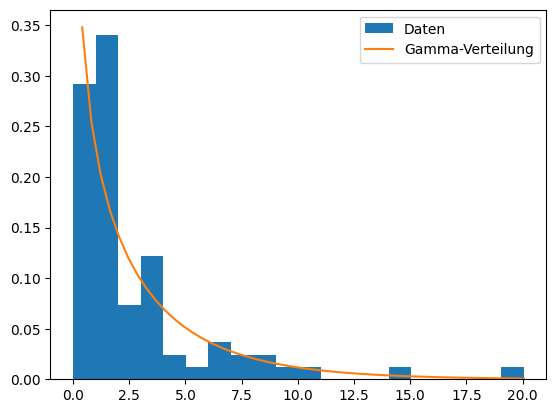

In [13]:
x2 = np.linspace(0, series2.max(), 50)
plt.hist(series2, bins=20, density=True, label="Daten")
plt.plot(x2, gamma2.pdf(x2), label="Gamma-Verteilung")
plt.legend(); plt.show()

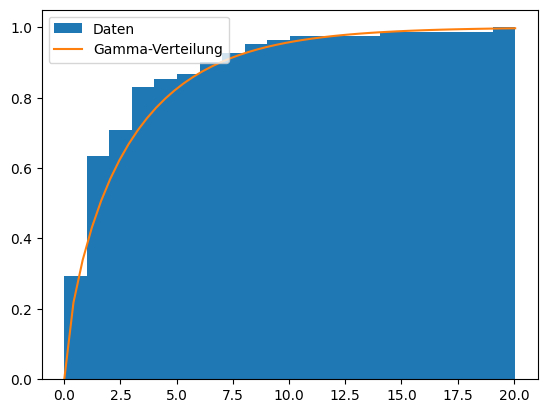

In [14]:
plt.hist(series2, bins=20, cumulative=True, density=True, label="Daten")
plt.plot(x2, gamma2.cdf(x2), label="Gamma-Verteilung")
plt.legend(); plt.show()

## Cohen's Effektgröße

- Maß für den Unterschied zwischen zwei Verteilungen
- Differenz der Erwartungswerte bezogen auf deren Standardabweichung

$$ d = \frac{\mu_1 - \mu_2}{\sigma^\star} $$

$$ \sigma^\star = \sqrt{\frac{(n_1-1)\sigma_1^2+(n_2-1)\sigma_2^2}{n_1+n_2-2}} $$

Daumenregeln zur Klassfikation der Werte von $d$ [[Sawilowski2009](https://doi.org/10.22237/jmasm/1257035100)]:

- 0.2 kleiner Effekt
- 0.5 mittlerer Effekt
- 0.8 großer Effekt
- 1.2 sehr großer Effekt
- 2.0 riesiger Effekt

## Regression



In [36]:
fk_data = pd.read_csv("bst_fk.csv", index_col=[0, 1, 2])
fk_data

flow_stress
temperature strain_rate strain               
800.0       0.1         0.000000    50.162090
                        0.000761    52.282859
                        0.001522    54.403668
                        0.002397    56.523232
                        0.003273    58.642824
...                                       ...
1200.0      10.0        1.212430    75.939399
                        1.224574    75.539097
                        1.236637    75.112381
                        1.248629    74.663197
                        1.260396    74.158213

[2109 rows x 1 columns]

In [31]:
def f(x, c):
    temp = x["temperature"]
    phi = x["strain"] +  0.01
    phid = x["strain_rate"] + 0.01
    return c[0] * np.exp(c[1]*temp)*temp**c[9]*phi**c[2]*np.exp(c[4]/phi)*(1+phi)**(c[5]*temp+c[6])*np.exp(c[7]*phi)*phid**(c[3]+c[8] * temp)


In [32]:
from scipy.optimize import least_squares

c0 = [1e3, -1e-3, -1e-2, 1, -1, 0, 0 , 0, 0, 0]

fit = least_squares(lambda c: f(fk_data.index.to_frame(), c) - fk_data["flow_stress"], c0)

In [19]:
fit.success

True

In [34]:
fit.x

array([ 3.62285841e+03, -2.72977285e-03,  4.72637710e-01, -6.07151281e-02,
        2.60624556e-04, -6.35055916e-04, -1.33549210e+00,  1.75032191e-01,
        2.05616372e-04,  4.52108194e-02])

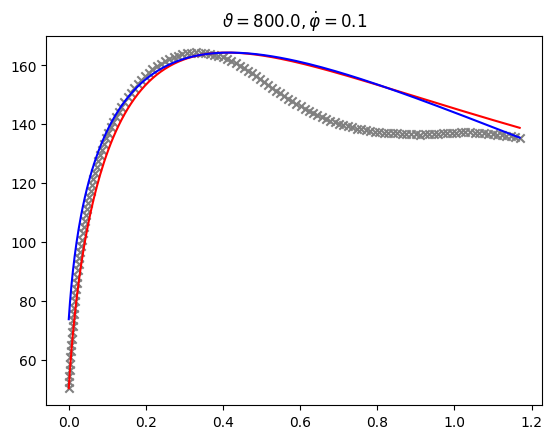

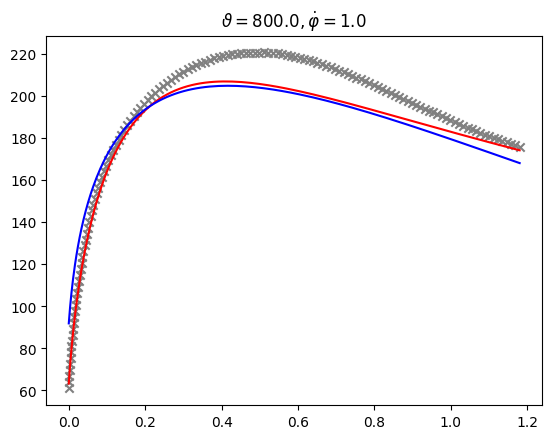

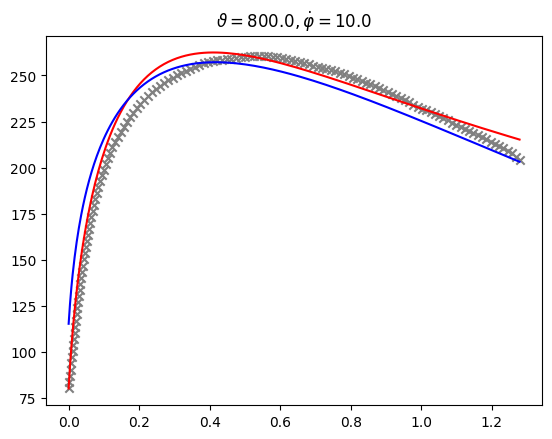

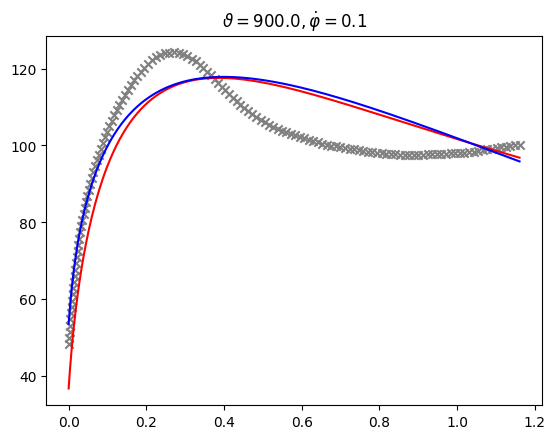

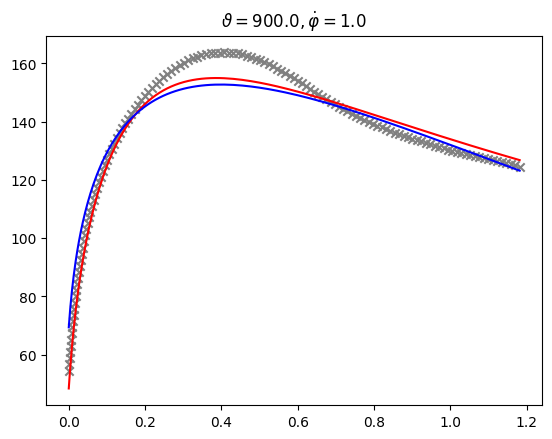

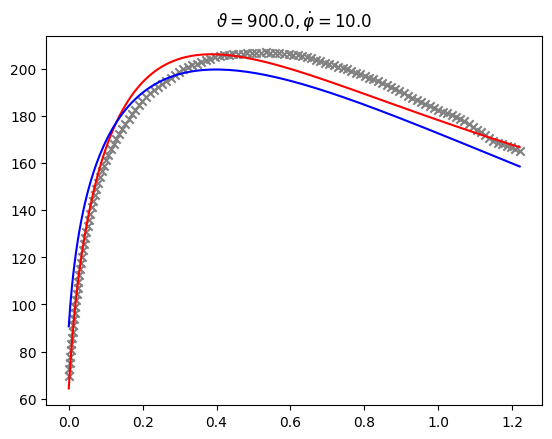

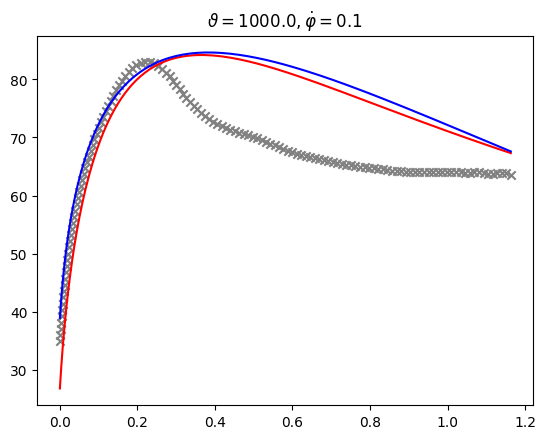

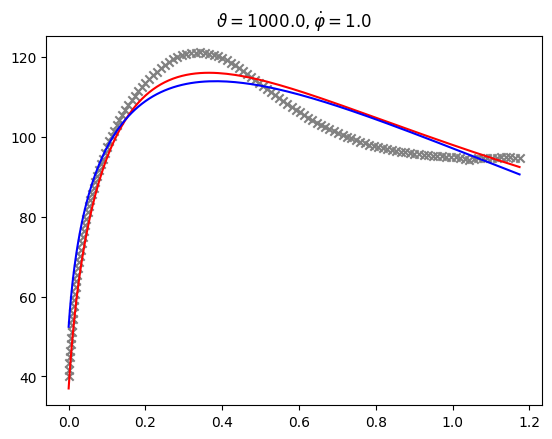

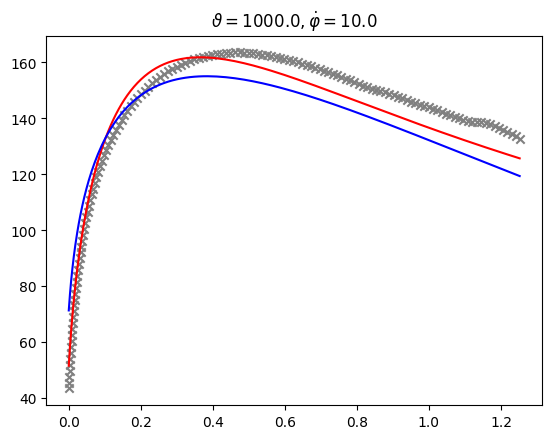

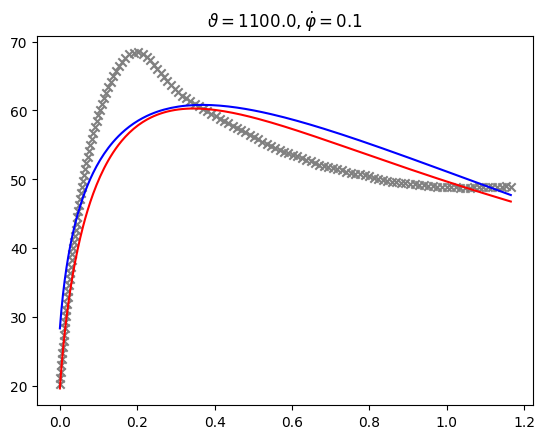

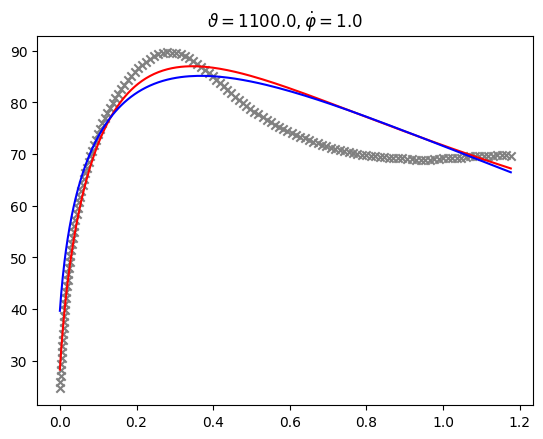

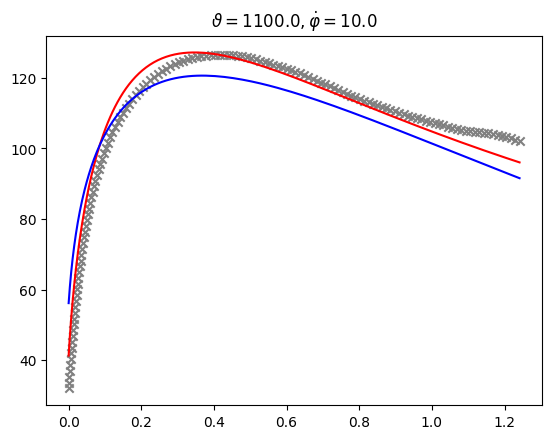

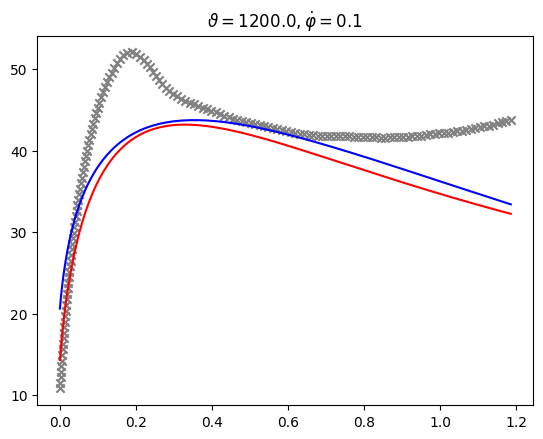

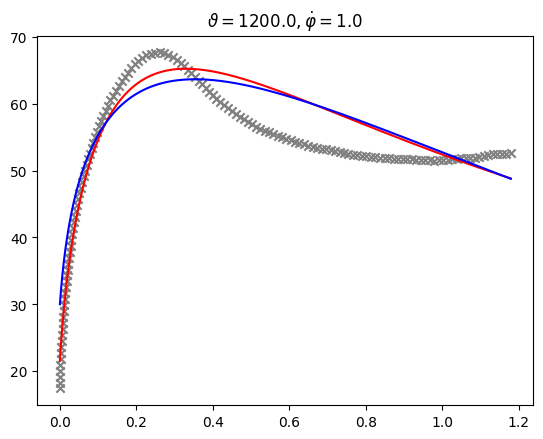

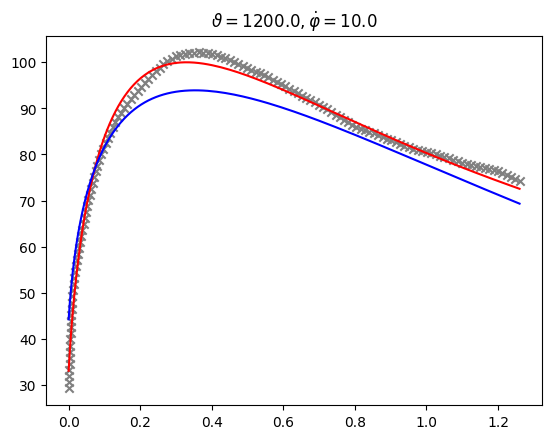

In [33]:
for n, g in fk_data.groupby(level=["temperature", "strain_rate"]):
    x = g.index.to_frame()["strain"]
    plt.title(fr"$\vartheta = {n[0]}, \dot{{\varphi}} = {n[1]}$")
    plt.scatter(x, g["flow_stress"], label=n, marker = "x", c="gray")
    plt.plot(x, f(g.index.to_frame(), fit.x), c="r")
    plt.plot(x, f(g.index.to_frame(), [4.88e3, -0.00273339, 0.302309, -0.0407581, 0.000222222, -0.000383134, 0, -0.492672, 0.000175044, -0.0611783]), c="b")
    plt.show()
